# <font color='red'>-----------------------------------------------------------------------------------------------------</font>
# <font color='blue'>Capstone Project 2 - Hotel booking Prediction</font>
## <font color='blue'>The data is related to customers likely to cancel hotel bookings or not </font>
# <font color='red'>-----------------------------------------------------------------------------------------------------</font>

## <ins><div class="alert alert-block alert-warning">*Objective: -*</div></ins>

### The goal is to make a predictive model to predict if the customer will cancel a hotel booking or not. The target variable is “is_canceled”.

### <ins><div class="alert alert-block alert-info">*Step 1: Loading all the libraries*</div></ins>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### <ins><div class="alert alert-block alert-info">*Step 2: Loading the dataset*</div></ins>

In [2]:
hot_book = pd.read_csv('hotel bookings.csv')
hot_book.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
hot_book.shape

(119390, 32)

### <ins><ins><div class="alert alert-block alert-info">*Step 3: Reading the file and getting basic information about the data*</div></ins>

- Basic information of the data

In [4]:
hot_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are 119390 entries and 32 columns in the dataset. There are null values in the dataset which we will treat. Also the dataset has mostly object, integer entries and float values

### <ins><ins><div class="alert alert-block alert-info">*Step 4: Cleaning data and Performing Exploratory Data Analysis*</div></ins>

- Finding total null values for each columns

In [5]:
hot_book.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Only three columns 'country', 'agent','company' have null values. Out of that 'company' has a huge number of null values. We will drop column 'company'. We will also remove the 'agent' & 'reservation_status_date' columns since it is not required Also we fill drop null values for 'country' and 'children' since excluding them will still retain 76% of the data

In [6]:
hot_book.drop(['company','agent','reservation_status_date'],axis=1,inplace=True)
hot_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We have successfully dropped the company column

- Dropping the null values

In [7]:
hot_book.dropna(subset=['country','children'],inplace=True)
hot_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [8]:
hot_book.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [9]:
# finding sum of null values

hot_book.isnull().sum().sum()

0

We have successfully removed all  null values from the dataset

We will create variables to store the numerical values and categorical vales

In [10]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

In [11]:
features = num_features+cat_features

In [12]:
hot_book.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


**As per the logic understood through the given explanation of the column name the data types are now properly segregated into categories and numerical values**

In [13]:
# checking statistical summary of the data
hot_book.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


There are certainly some outliers in the data for eg: 55 adults, 10 children, 10 babies seems little odd. We will have to treat the outliers. 

Lets check for these columns how many values are in max or in large numbers

In [14]:
print(np.sum(hot_book['adults'] == 55))
print(np.sum(hot_book['children'] == 10))
print(np.sum(hot_book['babies'] == 10))

1
1
1


- Removing the max values since there is only one value in max affecting as outlier

In [15]:
hot_book = hot_book[hot_book.adults != 55]
hot_book = hot_book[hot_book.children != 10]
hot_book = hot_book[hot_book.babies != 10]

In [16]:
hot_book.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000,118895.00000,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000,118895.000000
mean,0.371344,104.310450,2016.157677,27.166626,15.801043,0.92887,2.502107,1.857942,0.104125,0.007864,0.032011,0.087144,0.131637,0.221162,2.330813,102.003986,0.061887,0.571681
std,0.483166,106.902236,0.707452,13.589901,8.780355,0.99618,1.900053,0.557678,0.398144,0.092970,0.176031,0.845880,1.484691,0.652769,17.630671,50.485526,0.244175,0.792684
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.00000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.00000,41.000000,50.000000,3.000000,9.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


We still have some huge numbers in adults, adr and babies. Lets remove them as well

- filtering rows to check number of high values in adults,adr & babies

In [17]:
hot_book[(hot_book['adults'] <= 50) & (hot_book['adults'] > 10)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,...,A,A,0,No Deposit,0,Group,0.0,0,0,Canceled
2228,Resort Hotel,1,328,2015,October,41,6,2,5,20,...,D,D,1,No Deposit,0,Group,0.0,0,0,Canceled


In [18]:
hot_book[hot_book['babies']>2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78656,City Hotel,0,11,2015,October,42,11,2,1,1,...,A,B,1,No Deposit,0,Transient-Party,95.0,0,0,Check-Out


In [19]:
hot_book[hot_book['adr']>500]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,A,C,0,No Deposit,0,Transient,508.0,1,0,Check-Out
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,A,G,0,No Deposit,0,Transient,510.0,0,0,Check-Out


From above it is seen there are 2 values in 'adults' which are 40 & 50, 1 value in 'babies'above 2 and 1 value in adr=5400. We will remove them since we will consider it part of outlier treatment.

In [20]:
# dropping rows where 'adults' are 40 & 50 and 'babies' greater then 2 and adr=5400

hot_book.drop(hot_book[hot_book['adults'] >= 40].index, inplace = True)
hot_book.drop(hot_book[hot_book['babies'] > 2].index, inplace = True)
hot_book.drop(hot_book[hot_book['adr'] == 5400].index, inplace = True)  

In [21]:
hot_book.shape

(118891, 29)

Some preliminary outlier treatment has been done

In [22]:
# just for safety

hot_book1 = hot_book.copy()

In [23]:
hot_book1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000
mean,0.371332,104.308190,2016.157707,27.166463,15.801188,0.928876,2.502132,1.857222,0.104129,0.007789,0.032013,0.087147,0.131642,0.221152,2.330891,101.961199,0.061889,0.571700
std,0.483163,106.899822,0.707440,13.589946,8.780335,0.996185,1.900074,0.528467,0.398150,0.089239,0.176034,0.845894,1.484715,0.652771,17.630962,48.089569,0.244179,0.792691
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,27.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


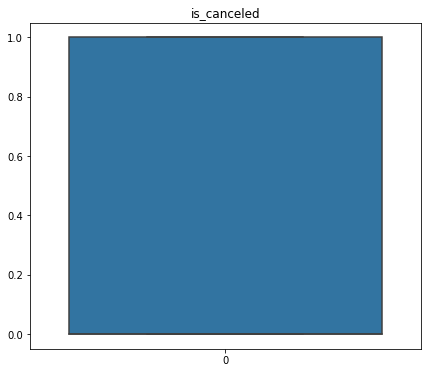

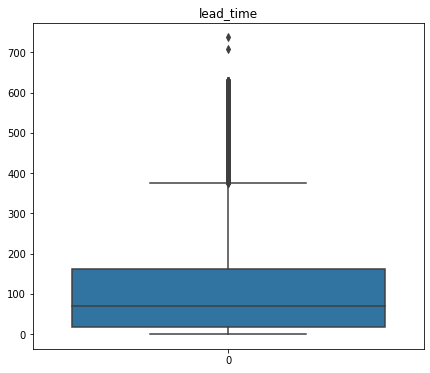

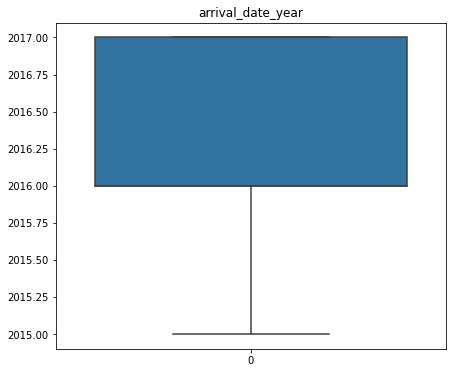

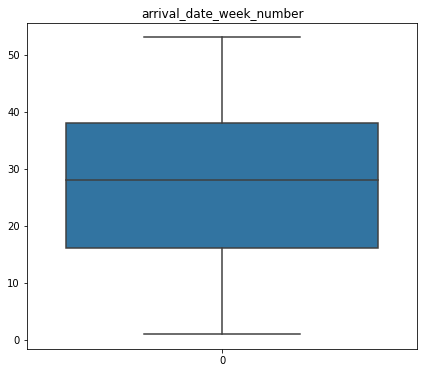

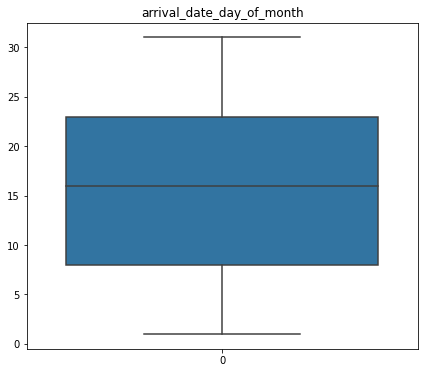

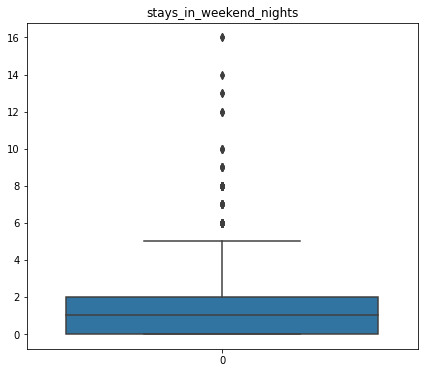

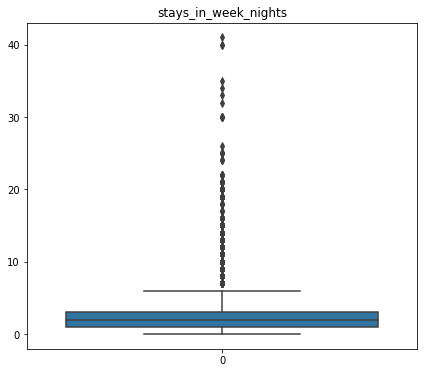

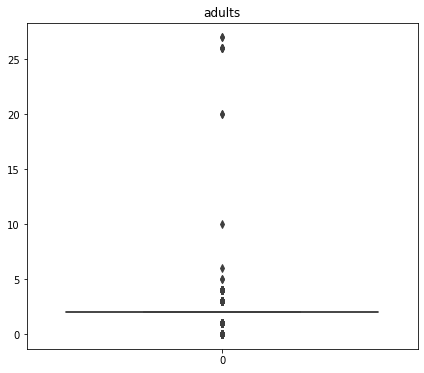

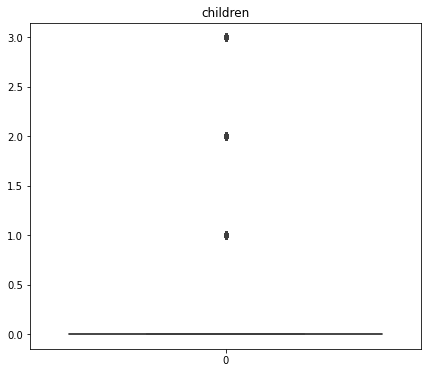

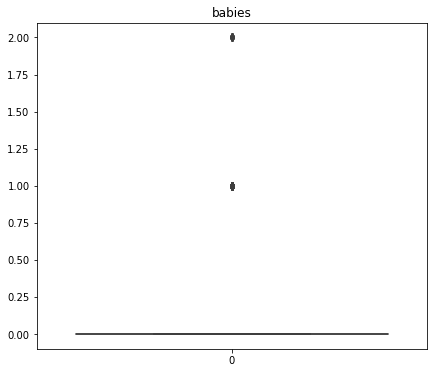

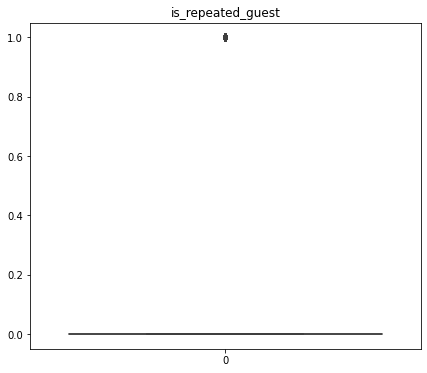

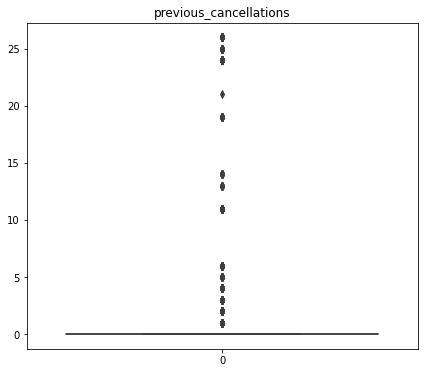

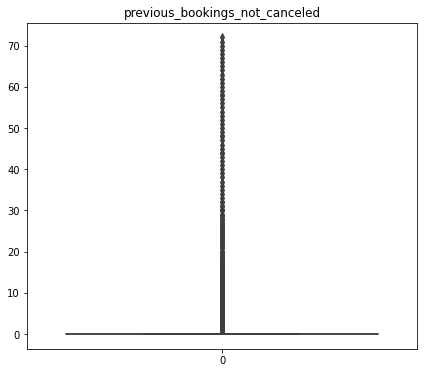

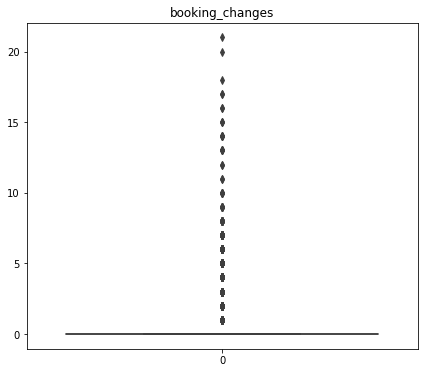

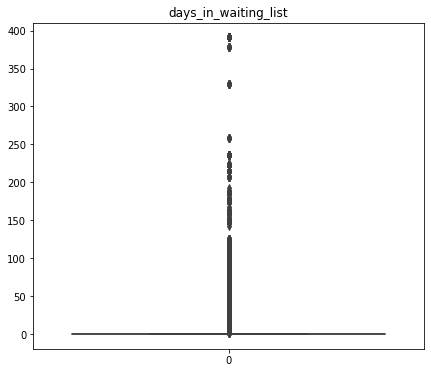

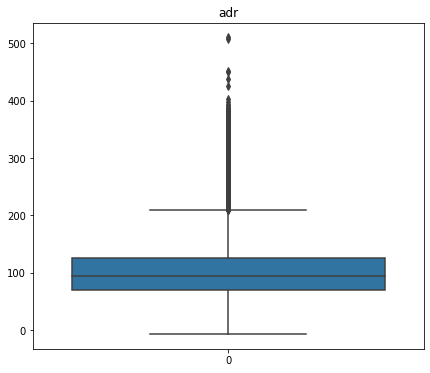

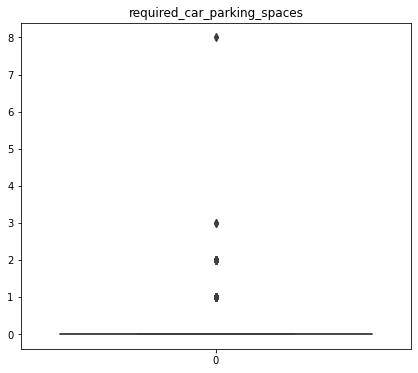

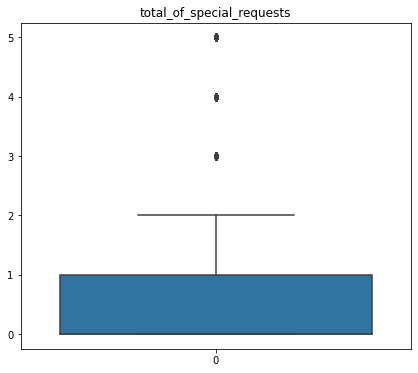

In [24]:
# checking for outliers 

num_values = hot_book1.select_dtypes(exclude='object')
num_list = num_values.columns.values.tolist()

for i in num_list:
    plt.figure(figsize=(7,6))
    sns.boxplot(data=hot_book1[i])
    plt.title(i)
    plt.show()

We have outliers is every column..some have extreme number of outliers. But every outlier is not necessarily bad since outliers dont necessarily affect prediction. We have already removed the extreme outliers earlier.

- Let's do some other plotting for variables

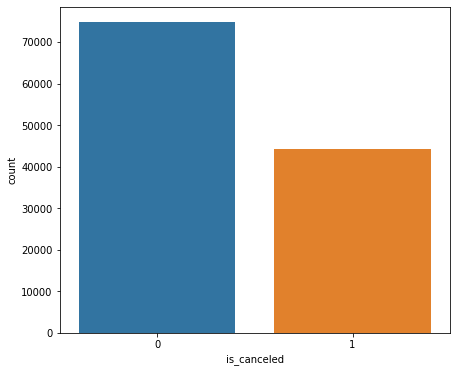

In [25]:
# plotting cancellations and non cancellations
plt.figure(figsize=(7,6))
sns.countplot(x='is_canceled',data=hot_book1)
plt.show()

We have majority of cancellations as 0 means many customers didnt cancel their booking

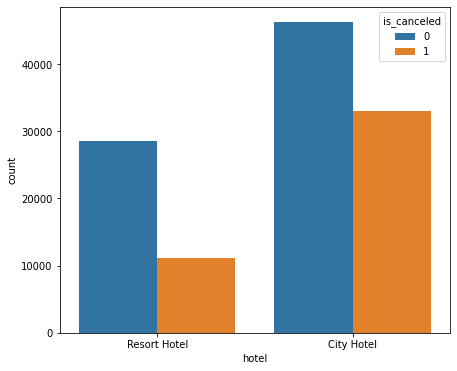

In [26]:
# plotting cancellations as per hotel typpe

plt.figure(figsize=(7,6))
sns.countplot(x='hotel', hue='is_canceled',data=hot_book1)
plt.show()

Major cancellations were observed in city hotel and non cancellations were also city hotels which indicates city hotels had more bookings compared to resort hotels

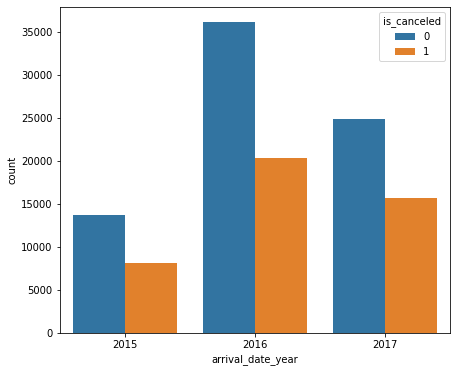

In [27]:
# plotting cancellations as per the year

plt.figure(figsize=(7,6))
sns.countplot(x='arrival_date_year', hue='is_canceled',data=hot_book1)
plt.show()

We have more cancellations observed in the year 2016 than 2015 & 2017

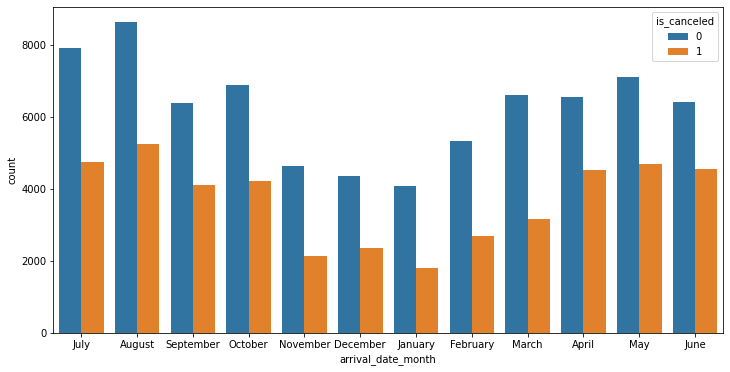

In [28]:
# plotting cancellations as per the month

plt.figure(figsize=(12,6))
sns.countplot(x='arrival_date_month', hue='is_canceled',data=hot_book1)
plt.show()

We are seeing cancellations rising from April and then steadying between May, June & July peaking in August and then dropping off from Sept with least cancellations in Nov, Dec & Jan explaining that those are festive seasons and hence cancellations are less frequent

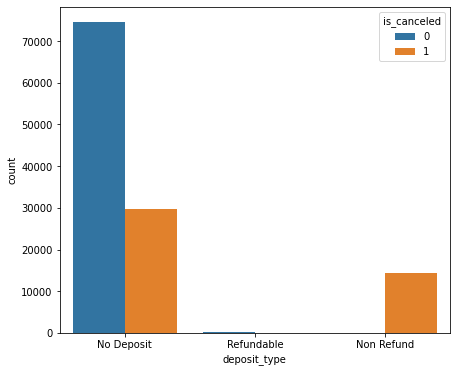

In [29]:
# plotting cancellations as per deposit

plt.figure(figsize=(7,6))
sns.countplot(x='deposit_type', hue='is_canceled',data=hot_book1)
plt.show()

A majority of cancellations obviously were customers who didnt make deposits compared to non refundable deposits

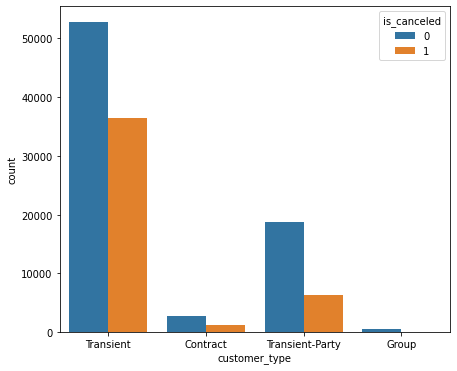

In [30]:
# plotting cancellations as per customer type

plt.figure(figsize=(7,6))
sns.countplot(x='customer_type', hue='is_canceled',data=hot_book1)
plt.show()

Transient customers have the maximum cancellations and non cancellations which implies probably these type of customers are doing maximum booking 

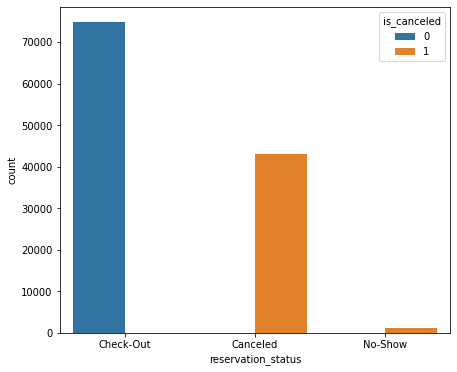

In [31]:
# plotting cancellations as per reservation_status

plt.figure(figsize=(7,6))
sns.countplot(x='reservation_status', hue='is_canceled',data=hot_book1)
plt.show()

Maximum customers checked in and already checked out however a good proportion of customers cancelled their reservations. A very small percentage didnt show up and neither informed the hotel

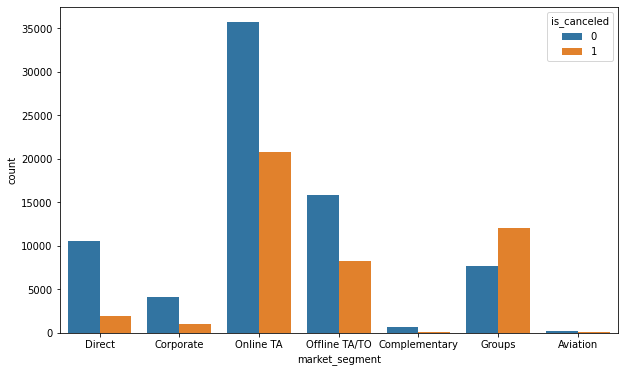

In [32]:
# plotting cancellations as per market_segment

plt.figure(figsize=(10,6))
sns.countplot(x='market_segment',hue='is_canceled',data=hot_book1)
plt.show()

Most customers are observed to be Online TA and cancellations are observed to be online TA bookings compared to other groups 

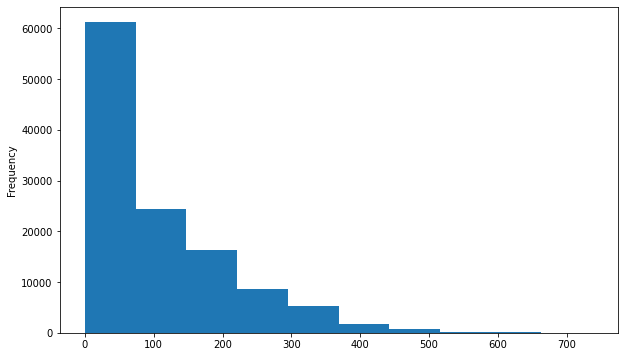

In [33]:
# plotting lead_time

plt.figure(figsize=(10,6))
hot_book1['lead_time'].plot.hist()
plt.show()

As per above plot the days between booking the hotel to arrival is between 0 -100 days means major number of customers have checked in within 100 days

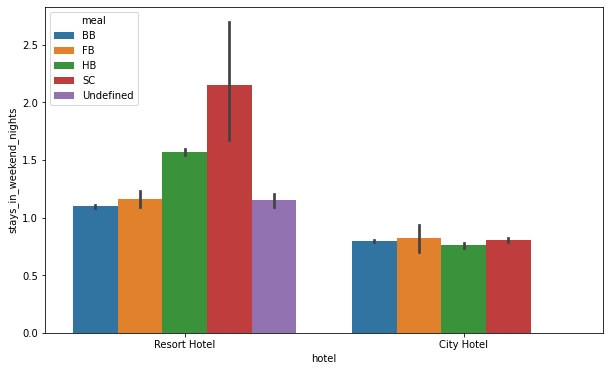

In [34]:
# plotting meals available hotel wise as per weekend stay

plt.figure(figsize=(10,6))
sns.barplot(x='hotel',y='stays_in_weekend_nights',hue='meal',data=hot_book1)
plt.show()

Most resort hotels didnt have any kind of meals offered for stays during weekend nights

**We are now ready to move to model building as we have done good enough EDA**

### <ins><div class="alert alert-block alert-info">*Step 5: Creating dummy variables for model building*</div></ins>

 - We will also drop country column since it doesnt serve a purpose

In [35]:
hot_book1.drop('country',axis=1,inplace=True)

In [36]:
features

['lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'adr',
 'hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

In [37]:
y = hot_book1['is_canceled']

In [38]:
hot_book1 = hot_book1[features]

In [39]:
hot_book2 = hot_book1.copy()

In [40]:
hot_book2_dummy = pd.get_dummies(hot_book2, columns = cat_features,drop_first=True)
hot_book2_dummy.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,27,1,0,0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,737,27,1,0,0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,27,1,0,1,1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13,27,1,0,1,1,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,27,1,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
hot_book2_dummy.shape

(118891, 54)

In [42]:
hot_book2_dummy.head(2)

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,27,1,0,0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,737,27,1,0,0,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
hot_book2 = hot_book2_dummy

In [44]:
hot_book2.shape

(118891, 54)

### <ins><div class="alert alert-block alert-info">*Step 6: Model Building pre-processing*</div></ins>

- Splitting the data into train and test set

In [45]:
# Split the dataframe into train and test sets

from sklearn.model_selection import train_test_split
X = hot_book2.loc[:,hot_book2.columns!='is_canceled']
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [46]:
print('Lenght of X_train',len(X_train),'\n')
print('Lenght of X_test',len(X_test),'\n')
print('Lenght of y_train',len(y_train),'\n')
print('Lenght of y_test',len(y_test))

Lenght of X_train 83223 

Lenght of X_test 35668 

Lenght of y_train 83223 

Lenght of y_test 35668


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83223 entries, 110536 to 38876
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       83223 non-null  int64  
 1   arrival_date_week_number        83223 non-null  int64  
 2   arrival_date_day_of_month       83223 non-null  int64  
 3   stays_in_weekend_nights         83223 non-null  int64  
 4   stays_in_week_nights            83223 non-null  int64  
 5   adults                          83223 non-null  int64  
 6   children                        83223 non-null  float64
 7   babies                          83223 non-null  int64  
 8   is_repeated_guest               83223 non-null  int64  
 9   previous_cancellations          83223 non-null  int64  
 10  previous_bookings_not_canceled  83223 non-null  int64  
 11  required_car_parking_spaces     83223 non-null  int64  
 12  total_of_special_requests  

In [48]:
# using standard scaler to scale the train & test variables

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train[num_features] = sc_x.fit_transform(X_train[num_features])
X_test[num_features] = sc_x.transform(X_test[num_features])

In [49]:
X_train[num_features]

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,adr
110536,0.175909,-0.745581,0.936780,0.072073,0.266009,0.259382,-0.262652,-0.08822,-0.180753,-0.10222,-0.088522,-0.251962,0.543749,0.077809
49959,1.719475,-0.745581,0.594691,-0.935002,-0.263319,0.259382,-0.262652,-0.08822,-0.180753,-0.10222,-0.088522,-0.251962,-0.720038,-0.829383
105658,-0.057964,-1.554110,-0.659636,0.072073,-0.263319,0.259382,-0.262652,-0.08822,-0.180753,-0.10222,-0.088522,-0.251962,3.071324,-0.518345
44508,-0.067319,1.018483,-1.001725,-0.935002,-0.263319,0.259382,-0.262652,-0.08822,-0.180753,-0.10222,-0.088522,-0.251962,-0.720038,-0.829383
39587,1.354632,0.430462,0.138572,1.079148,0.266009,0.259382,2.237197,-0.08822,-0.180753,-0.10222,-0.088522,-0.251962,0.543749,1.366748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66111,1.813024,-0.892586,-0.203517,0.072073,-0.263319,0.259382,-0.262652,-0.08822,-0.180753,-0.10222,-0.088522,-0.251962,-0.720038,-0.248780
78151,-0.937329,1.018483,-1.343814,0.072073,-1.321975,-1.576364,-0.262652,-0.08822,-0.180753,-0.10222,-0.088522,-0.251962,0.543749,-2.115003
80180,-0.974749,1.385996,-0.773665,0.072073,0.266009,0.259382,-0.262652,-0.08822,-0.180753,-0.10222,-0.088522,3.885577,0.543749,0.082993
56576,-0.927974,0.724472,-0.887695,0.072073,0.266009,0.259382,-0.262652,-0.08822,-0.180753,-0.10222,-0.088522,-0.251962,1.807537,0.819115


In [50]:
X_test[num_features]

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,adr
43963,-0.151514,0.871478,1.164840,1.079148,-0.263319,0.259382,-0.262652,-0.08822,-0.180753,-0.102220,-0.088522,-0.251962,-0.720038,1.410086
80339,-0.759585,1.680007,-0.773665,0.072073,0.795338,0.259382,-0.262652,-0.08822,5.532420,1.027238,-0.088522,-0.251962,-0.720038,-0.684232
52509,-0.450872,-0.231062,-0.887695,-0.935002,-0.792647,0.259382,-0.262652,-0.08822,-0.180753,-0.102220,-0.088522,-0.251962,-0.720038,0.373295
5619,0.456558,-0.598576,-1.115755,-0.935002,-0.263319,-1.576364,-0.262652,-0.08822,-0.180753,-0.102220,-0.088522,-0.251962,0.543749,-1.200554
98785,-0.909264,1.018483,-1.457844,0.072073,-0.792647,0.259382,-0.262652,-0.08822,-0.180753,-0.102220,-0.088522,-0.251962,0.543749,0.788011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59172,-0.432162,1.165488,0.594691,0.072073,-0.263319,0.259382,4.737045,-0.08822,-0.180753,-0.102220,-0.088522,-0.251962,1.807537,1.990688
70066,0.690431,-0.304565,-0.773665,-0.935002,-0.263319,0.259382,-0.262652,-0.08822,-0.180753,-0.102220,-0.088522,-0.251962,-0.720038,0.580653
85662,-0.656681,-1.113094,-0.089487,-0.935002,1.324666,2.095128,-0.262652,-0.08822,-0.180753,-0.102220,-0.088522,-0.251962,0.543749,1.318848
71241,0.288169,-0.084057,1.620958,-0.935002,-0.792647,0.259382,-0.262652,-0.08822,-0.180753,-0.102220,-0.088522,-0.251962,-0.720038,0.580653


In [51]:
scale_obj = X_train[num_features]

In [52]:
# import joblib
# scaler_filename = 'scale.pkl'
# joblib.dump(scale_obj,scaler_filename)

In [53]:
X_train.columns

Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'required_car_parking_spaces',
       'total_of_special_requests', 'adr', 'hotel_Resort Hotel',
       'arrival_date_month_August', 'arrival_date_month_December',
       'arrival_date_month_February', 'arrival_date_month_January',
       'arrival_date_month_July', 'arrival_date_month_June',
       'arrival_date_month_March', 'arrival_date_month_May',
       'arrival_date_month_November', 'arrival_date_month_October',
       'arrival_date_month_September', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'distribution_channel_Direct'

The train variables have all been scaled using standard scaler and now we are ready to fit create logistic regression modelling

### <ins><ins><div class="alert alert-block alert-info">*Step 7: Perfoming modeling*</div></ins>

- Applying the logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_model = log_reg.fit(X_train,y_train)
print('Train accuracy:',log_model.score(X_train,y_train)*100)

Train accuracy: 80.97521117960179


In [55]:
print('Test accuracy:',log_model.score(X_test,y_test)*100)

Test accuracy: 80.7390377929797


In [56]:
y_pred = log_model.predict(X_test)

AUC: 0.76


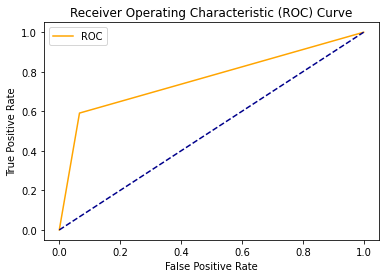

In [57]:
# plotting ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

# Get the ROC Curve.

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC Curve using our defined function

plot_roc_curve(fpr, tpr)

- Creating confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[21029  1495]
 [ 5375  7769]]


In [59]:
# checking accuracy score

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 80.7390377929797


In [60]:
# checking the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22524
           1       0.84      0.59      0.69     13144

    accuracy                           0.81     35668
   macro avg       0.82      0.76      0.78     35668
weighted avg       0.81      0.81      0.80     35668



Let's build the model using random forest and check if there is improvement in accuracy

In [73]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_rf=clf.predict(X_test)

# prionting the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf)*100)

Accuracy: 86.11921049680386


In [74]:
# checking the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     22524
           1       0.85      0.75      0.80     13144

    accuracy                           0.86     35668
   macro avg       0.86      0.84      0.85     35668
weighted avg       0.86      0.86      0.86     35668



In [75]:
#checking confusion matrix for random forest

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix)

[[20833  1691]
 [ 3260  9884]]


Let's do some hyperparameter tuning to get better accuracy of the random forest regressor

In [80]:
# using randomised search cv

clf_random=RandomForestClassifier()

# no of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000,num=12)]
# no of features to consider at every split
max_features = ['auto', 'sqrt']
# max no of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# minimum number of samples to split a node
min_samples_split = [2,5,10,15,100]
# The minimum number of samples required to be at a leaf node
min_samples_leaf = [1,2,5,10]

In [81]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# create random grid

random_grid = {'bootstrap': [True],
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth':max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'bootstrap': [True], 'n_estimators': [100, 272, 445, 618, 790, 963, 1136, 1309, 1481, 1654, 1827, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


using random search cv in the model

In [84]:
clf_rscv = RandomizedSearchCV(estimator=clf_random,
                                param_distributions=random_grid,
                                n_iter=10,
                                scoring='neg_mean_squared_error',
                                n_jobs=-1,
                                cv=5,
                                verbose=2,
                                random_state=42)
clf_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 22.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 272, 445, 618,
                                                         790, 963, 1136, 1309,
                                                         1481, 1654, 1827,
                                                         2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
# making prediction
y_pred_rscv=clf_rscv.predict(X_test)

# prionting the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rscv)*100)

Accuracy: 85.68184366939555


In [86]:
# checking the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rscv))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     22524
           1       0.86      0.73      0.79     13144

    accuracy                           0.86     35668
   macro avg       0.86      0.83      0.84     35668
weighted avg       0.86      0.86      0.85     35668



In [87]:
#checking confusion matrix for random forest

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rscv)
print(confusion_matrix)

[[21002  1522]
 [ 3585  9559]]


- Estimating performance of logistic regression using KFold cross validation

In [88]:
#using KFold cross validation for logistic regression
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(log_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)))

Accuracy: 79.204 (0.004)


- Estimating performance of random forest using KFold cross validation

In [89]:
#using KFold cross validation for Random forest regression
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)))

Accuracy: 86.570 (0.002)


Since hyperparameter tuning didnt increase the performance of the random forest model hence we will select the random forest model without hyper parameter tuning

In [90]:
#creating pkl file

import joblib
model_filename = 'model.pkl'
joblib.dump(clf,model_filename)

['model.pkl']

From the above it is observed that model has performed quite well with Random forest cross validation accuracy at 86.631%

### <ins><ins><div class="alert alert-block alert-info">*Observations for the Logistic regression models*</div></ins>

- **Test accuracy and training accuracy using random forest regression is 86.6%**
- **Precision, recall & accuracy of the model is again 86%,92% & 86%.**
- **Performance using KFold validation was again 86.63%**
- **Thus the model using random forest has performed good on test set.**